# downloading dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rahul713","key":"ee3ba3d72e0aaca9b6393d3a6b2a2c5c"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset

  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 52.7MB/s]


In [4]:
!unzip ibm-hr-analytics-attrition-dataset.zip

Archive:  ibm-hr-analytics-attrition-dataset.zip
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


# importing libraries and dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [6]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# data exploring

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.drop(columns=['Over18' , 'EmployeeCount' ,'StandardHours'] , inplace= True)

In [10]:
print("Total number of duplicates : ",df.duplicated().sum().sum())

Total number of duplicates :  0


In [11]:
print("Total number of missing values : " , df.isnull().sum().sum())

Total number of missing values :  0


In [12]:
obj_cols = df.select_dtypes(include = 'object').columns
print("number of categorical variable : ",len(obj_cols))

number of categorical variable :  8


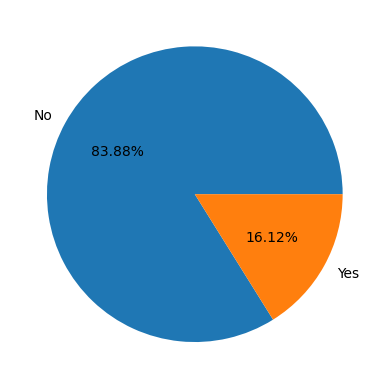

In [13]:
plt.pie(df.Attrition.value_counts() , labels=['No' , 'Yes'], autopct='%0.2f%%');

## handling categorical variable

In [14]:
obj_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [15]:
df[obj_cols].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [16]:
for i in obj_cols:
  print(i,' : ' , df[i].unique())
  print('-'*50)

Attrition  :  ['Yes' 'No']
--------------------------------------------------
BusinessTravel  :  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
--------------------------------------------------
Department  :  ['Sales' 'Research & Development' 'Human Resources']
--------------------------------------------------
EducationField  :  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
--------------------------------------------------
Gender  :  ['Female' 'Male']
--------------------------------------------------
JobRole  :  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
--------------------------------------------------
MaritalStatus  :  ['Single' 'Married' 'Divorced']
--------------------------------------------------
OverTime  :  ['Yes' 'No']
--------------------------------------------------


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
for i in obj_cols:
  df[i+'_Encoded'] = encoder.fit_transform(df[i])

In [19]:
df.shape

(1470, 40)

In [20]:
df_obj = df[obj_cols]
df.drop(columns=obj_cols , inplace= True)

## plotting graphs

<Axes: xlabel='Age', ylabel='Count'>

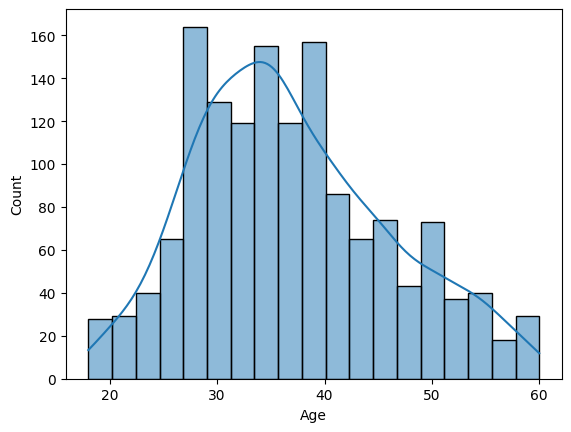

In [21]:
sns.histplot(df.Age , kde = True)

In [22]:
px.histogram(df.Age, color=df.Attrition_Encoded, marginal='box', title='Age Distribution by Attrition',  color_discrete_sequence=['red', 'blue'])

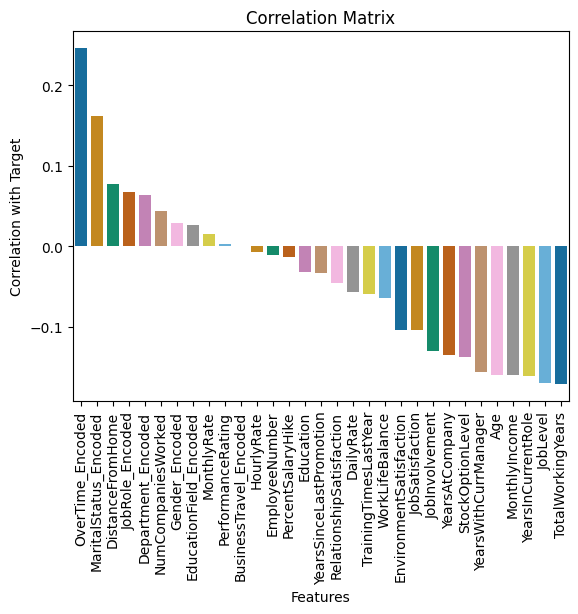

In [23]:
features = df.drop(columns = ['Attrition_Encoded'])
correlation = features.corrwith((df.Attrition_Encoded)).sort_values(ascending = False)

sns.barplot(x = correlation.index , y = correlation.values , palette = 'colorblind')
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Correlation Matrix')
plt.show()

In [24]:
drop_col = correlation[abs(correlation * 100) < 2].index
drop_col

Index(['MonthlyRate', 'PerformanceRating', 'BusinessTravel_Encoded',
       'HourlyRate', 'EmployeeNumber', 'PercentSalaryHike'],
      dtype='object')

In [25]:
df.drop(columns=drop_col , inplace = True)

<Axes: >

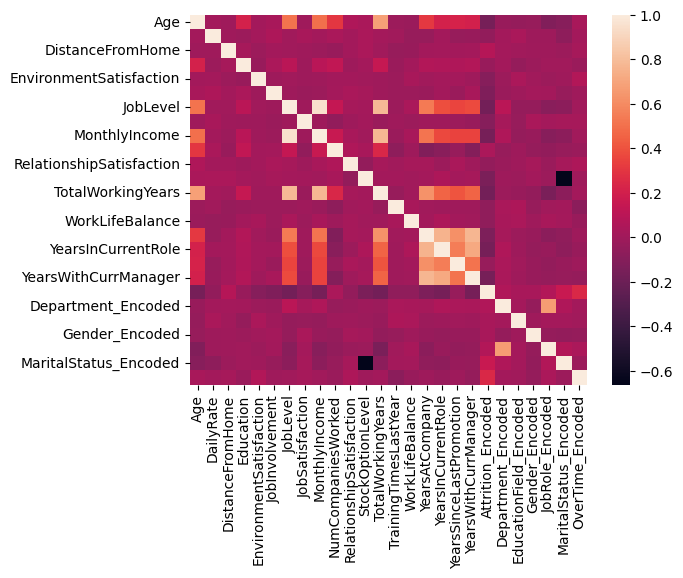

In [26]:
sns.heatmap(df.corr())

# models

In [27]:
features = df.drop(columns = 'Attrition_Encoded').copy()
target = df.Attrition_Encoded

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features=scaler.fit_transform(features)

In [29]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(features , target , test_size=0.20 , random_state=0)

In [30]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [32]:
lr  = LogisticRegression(random_state=0)
rf = RandomForestClassifier(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0)
cart = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()
gnb = GaussianNB()

catboost_params = {'verbose': 0,}
catboost = CatBoostClassifier(**catboost_params , random_state=0)

lgb_params = {'verbosity': -1,}
lightgbm = LGBMClassifier(**lgb_params , random_state=0)

In [33]:
from sklearn.metrics import accuracy_score , precision_score , f1_score , recall_score , confusion_matrix , roc_curve , auc
from sklearn.model_selection import cross_val_score , learning_curve

In [34]:

def get_result(model_name , y_test , y_pred):
  accuracy = accuracy_score(y_test , y_pred)
  precision = precision_score(y_test , y_pred)
  recall = recall_score(y_test , y_pred)
  f1 = f1_score(y_test , y_pred)
  result = pd.DataFrame([[model_name , round(accuracy,2) , round(precision , 2) , round(recall ,2) , round(f1,2)]],
                        columns=['Model','accuracy' , 'precision' , 'recall' , 'f1'])
  return result



def cross_result(model , model_name , X_train , y_train):
  accuracies = cross_val_score(model, X_train , y_train , cv=5)

  cross_res = pd.DataFrame([[model_name , round(accuracies.mean()*100 , 2) , round(accuracies.std()*100 , 2)]] ,
                            columns=['Model' , 'Accuracy (mean) in percentage' , 'Standard Deviation in percentage'])
  return cross_res
def get_learning_curves(model , model_name , X_train , y_train):
  global total_learning_curves
  train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, cv=5)
  total_learning_curves[model_name] = {
        'train_sizes': train_sizes,
        'train_scores': train_scores,
        'valid_scores': valid_scores
  }


def get_roc_curve(model , model_name , X_test):
  global total_roc_curves
  y_pred_proba = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  total_roc_curves[model_name] = {
        'fpr': fpr,
        'tpr': tpr,
        'thresholds': thresholds
  }

def get_confusion_matrix(model_name , y_test , y_pred):
  global total_cm
  total_cm[model_name] = confusion_matrix(y_test , y_pred)


In [35]:
Models = [lr , rf , gbc, xgboost , cart , knn , gnb , catboost , lightgbm]
Result = pd.DataFrame()
Result_cross_validation = pd.DataFrame()
total_cm = {}
total_learning_curves = {}
total_roc_curves = {}

In [36]:
for model in Models:

  model_name = model.__class__.__name__
  model.fit(x_train , y_train)
  y_pred = model.predict(x_test)

  temp = get_result(model_name = model_name , y_test = y_test , y_pred = y_pred)
  Result = pd.concat([temp,Result] , ignore_index = True)

  get_confusion_matrix(model_name=model_name , y_test = y_test , y_pred = y_pred)

  get_learning_curves(model=model , model_name= model_name , X_train = x_train , y_train = y_train )

  get_roc_curve(model=model , model_name= model_name , X_test = x_test)

  temp2 = cross_result(model = model , model_name= model_name , X_train = x_train , y_train = y_train)
  Result_cross_validation = pd.concat([temp2 , Result_cross_validation] , ignore_index=True)


In [37]:
Result.style.highlight_max(subset= Result.columns[1:], color = '#99FF99').highlight_min(subset= Result.columns[1:],color = '#FF9999')

,Model,accuracy,precision,recall,f1
0,LGBMClassifier,0.870000,0.750000,0.310000,0.430000
1,CatBoostClassifier,0.880000,0.890000,0.330000,0.480000
2,GaussianNB,0.790000,0.420000,0.650000,0.510000
3,KNeighborsClassifier,0.850000,0.730000,0.160000,0.270000
4,DecisionTreeClassifier,0.770000,0.310000,0.330000,0.320000
5,XGBClassifier,0.850000,0.580000,0.290000,0.380000
6,GradientBoostingClassifier,0.860000,0.700000,0.330000,0.440000
7,RandomForestClassifier,0.840000,0.620000,0.160000,0.260000
8,LogisticRegression,0.880000,0.790000,0.390000,0.520000


In [38]:
Result_cross_validation.style.highlight_max(subset= Result_cross_validation.columns[1:], color = '#99FF99').highlight_min(subset= Result_cross_validation.columns[1:],color = '#FF9999')

,Model,Accuracy (mean) in percentage,Standard Deviation in percentage
0,LGBMClassifier,86.140000,1.260000
1,CatBoostClassifier,86.650000,0.800000
2,GaussianNB,77.210000,2.820000
3,KNeighborsClassifier,84.180000,0.950000
4,DecisionTreeClassifier,78.660000,3.240000
5,XGBClassifier,86.480000,0.880000
6,GradientBoostingClassifier,86.820000,1.090000
7,RandomForestClassifier,86.390000,1.360000
8,LogisticRegression,86.900000,1.150000


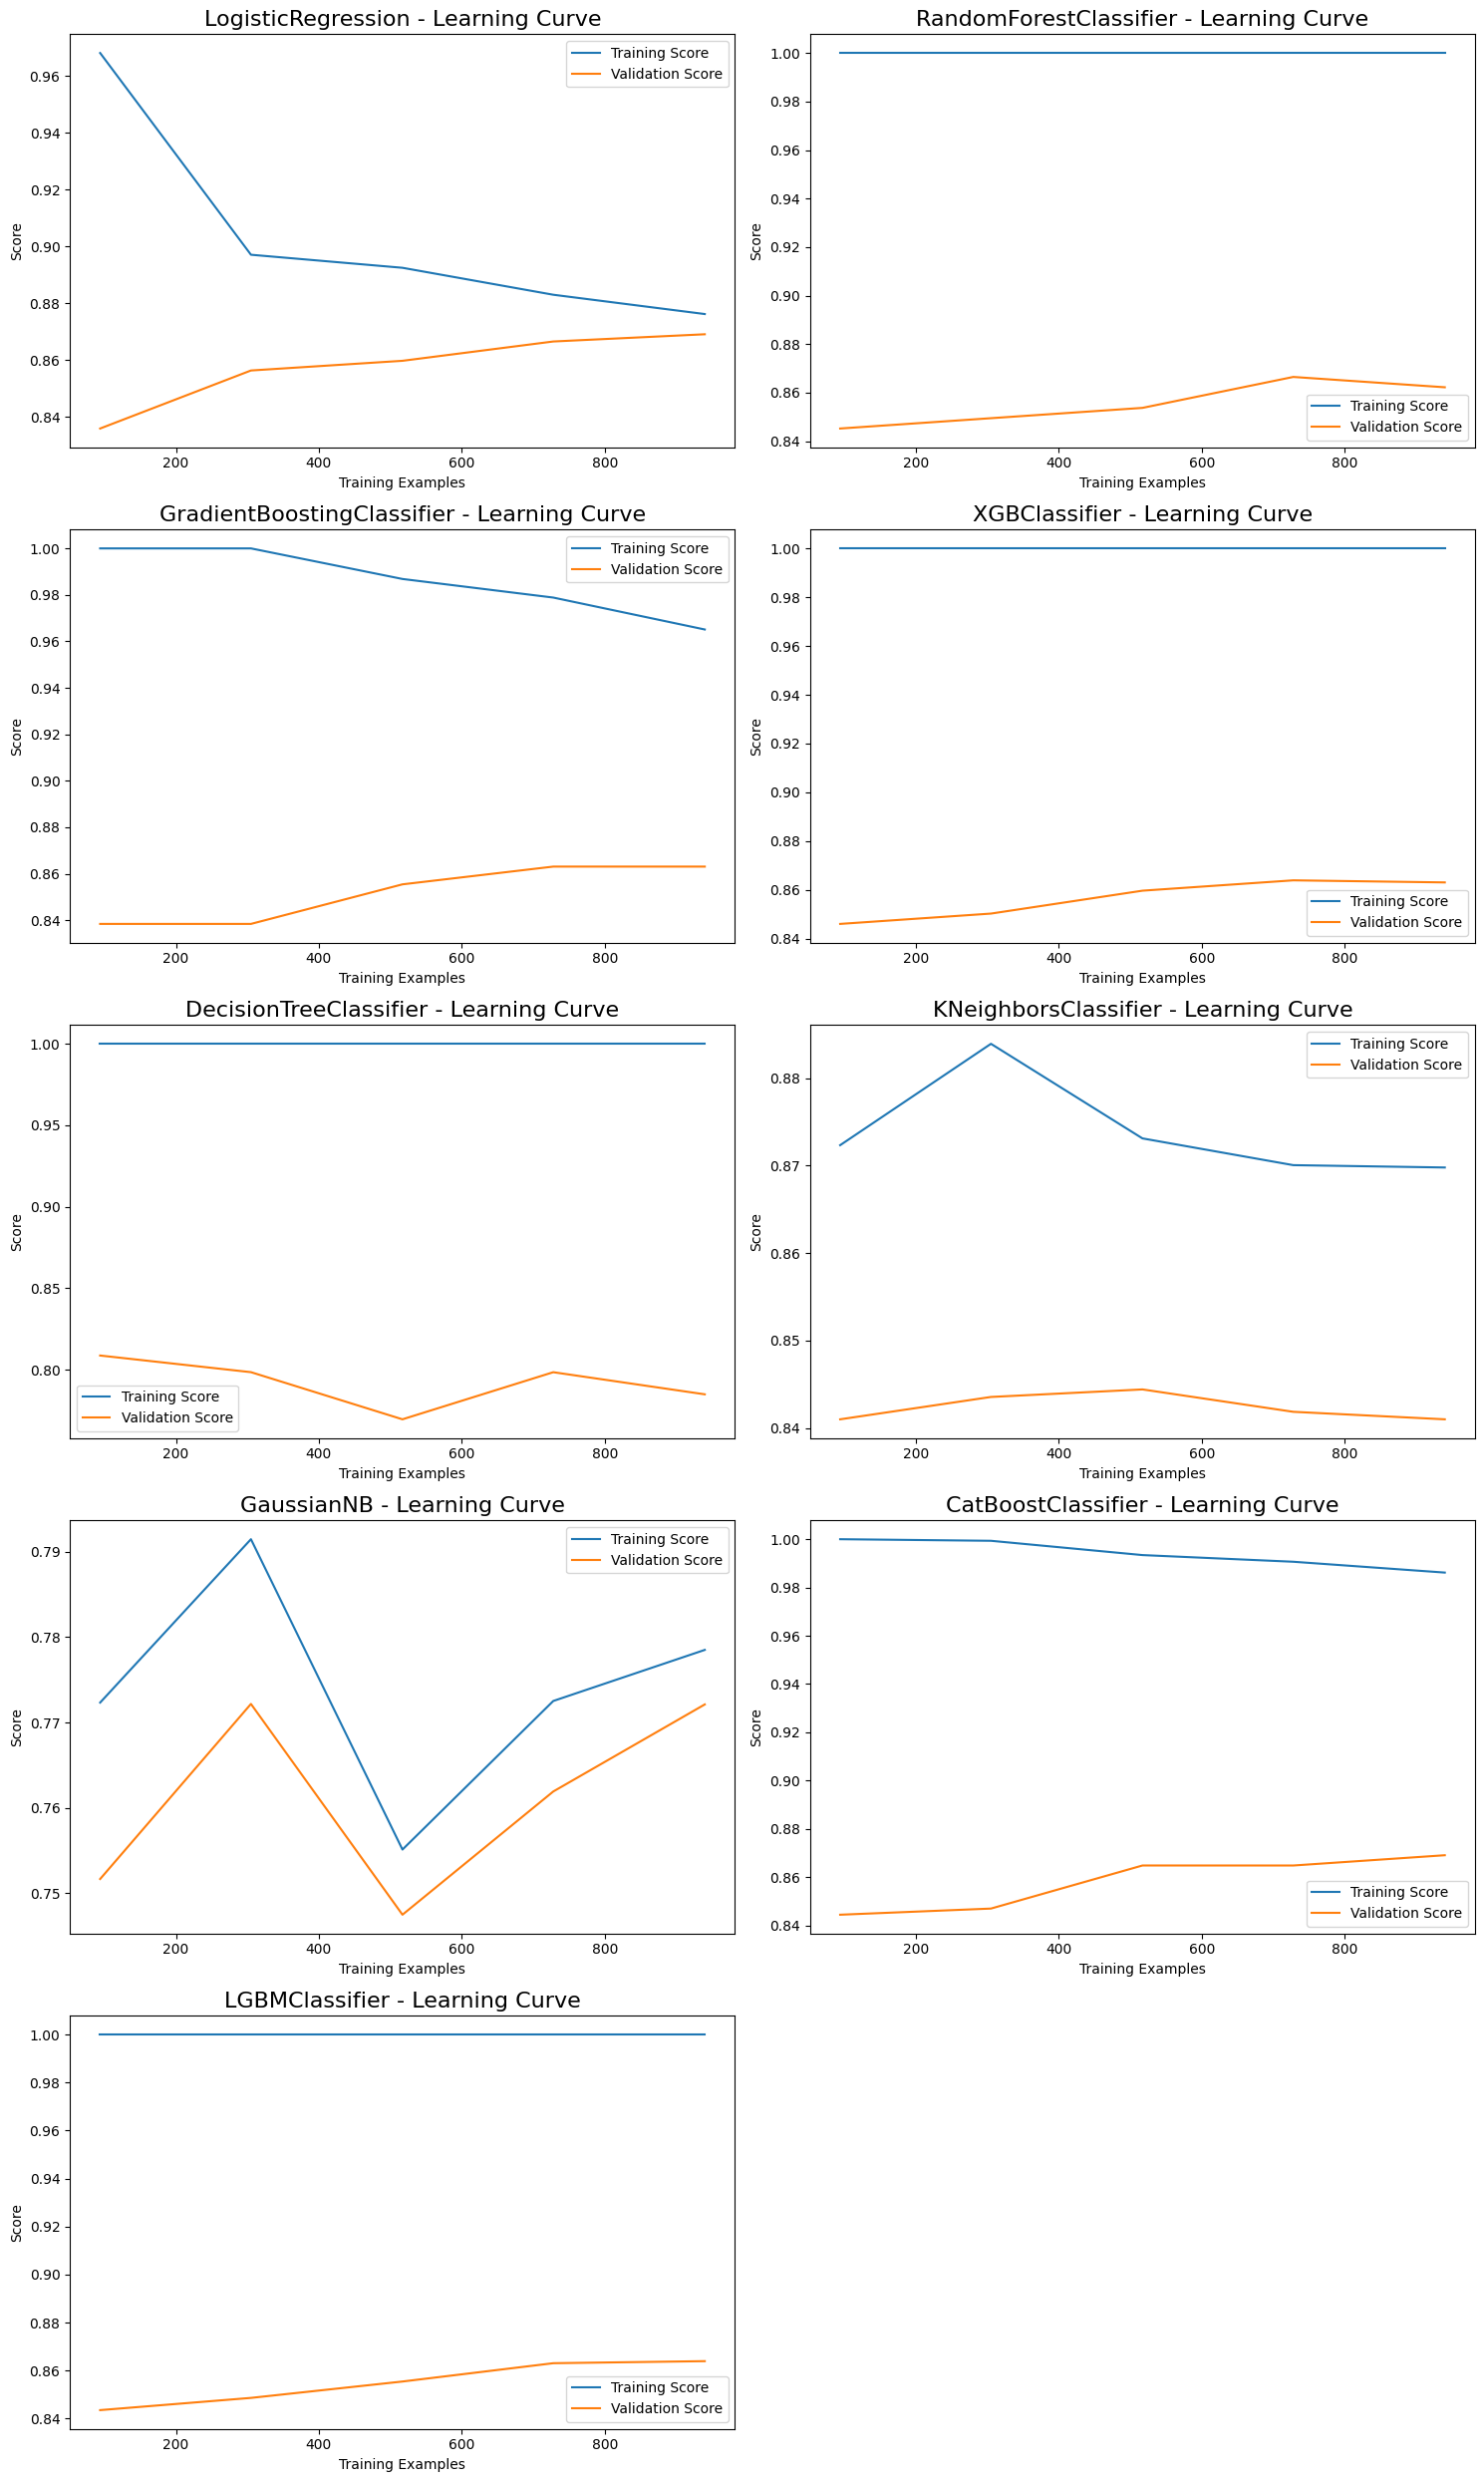

In [39]:
num_models = len(Models)
num_cols = 2
num_rows = (num_models + 1) // 2  # Add 1 to ensure at least 1 row is created

# Create a 2-column grid with the specified number of rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through your models and plot the stored learning curves
for i, model in enumerate(Models):
    model_name = model.__class__.__name__

    # Retrieve learning curve data from total_learning_curves
    learning_curve_data = total_learning_curves.get(model_name)

    if learning_curve_data:
        train_sizes, train_scores, valid_scores = (
            learning_curve_data['train_sizes'],
            learning_curve_data['train_scores'],
            learning_curve_data['valid_scores'],
        )

        # Compute mean scores
        train_scores_mean = np.mean(train_scores, axis=1)
        valid_scores_mean = np.mean(valid_scores, axis=1)

        # Plot learning curves on the i-th subplot
        ax = axes[i]
        ax.plot(train_sizes, train_scores_mean, label='Training Score')
        ax.plot(train_sizes, valid_scores_mean, label='Validation Score')
        ax.set_title(f'{model_name} - Learning Curve', fontsize=16)
        ax.set_xlabel('Training Examples')
        ax.set_ylabel('Score')
        ax.legend()

# Remove any empty subplots
for i in range(num_models, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust subplot layout
plt.tight_layout()
plt.show()

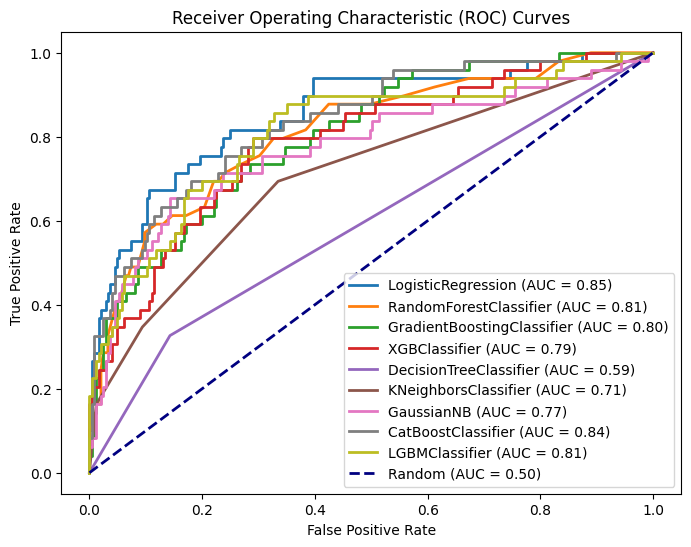

In [40]:
plt.figure(figsize=(8, 6))

# Iterate through your models and plot ROC curves
for model in Models:
    model_name = model.__class__.__name__

    # Retrieve ROC curve data from total_roc_curves
    roc_curve_data = total_roc_curves.get(model_name)

    if roc_curve_data is not None:  # Check if roc_curve_data is not None
        fpr, tpr, thresholds = roc_curve_data['fpr'], roc_curve_data['tpr'], roc_curve_data['thresholds']

        # Calculate AUC (Area Under the Curve)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Draw the diagonal line with ROC = 0.50
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (AUC = 0.50)')

# Set labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

# Show the ROC curve
plt.show()
